In [1]:
from sklearn.model_selection import cross_val_score

In [2]:
nme = '20230710_2e+06'
FILENAME = f"../../data/Preprocessed/chartevents_{nme}_labeled.csv"

In [3]:
%run "../utils/reader.ipynb"

# 決策樹

[Text(0.3333333333333333, 0.875, 'x[4] <= 91.5\ngini = 0.5\nsamples = 67\nvalue = [34, 33]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.5, 0.625, 'x[2] <= 79.0\ngini = 0.413\nsamples = 48\nvalue = [34, 14]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.6666666666666666, 0.375, 'x[5] <= 38.65\ngini = 0.283\nsamples = 41\nvalue = [34, 7]'),
 Text(0.5, 0.125, 'gini = 0.188\nsamples = 38\nvalue = [34, 4]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]')]

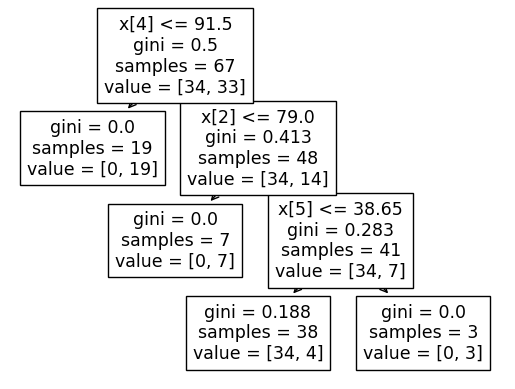

In [4]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=3)
model = model.fit(X_train, y_train)
tree.plot_tree(model)

In [5]:
from graphviz import Source
features = list(mark)
dot_data = tree.export_graphviz(model, feature_names=features)
graph = Source(dot_data)
graph.render(view=True, format="pdf", filename=f"../../charts/tree")

'../../charts/tree.pdf'

In [6]:
len(X_train), len(X_test)

(67, 17)

In [7]:
cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy').mean()

0.9

In [8]:
model.score(X_test, y_test)

1.0

In [9]:
scores = cross_val_score(tree.DecisionTreeClassifier(max_depth=3), df_under_resample, df_under_label_resample, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())

[0.58823529 1.         1.         0.88235294 0.9375    ]
0.8816176470588235


In [10]:
model.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=3)>

In [11]:
A_x = X_test[y_test==True]
A_y = y_test[y_test==True]
A_x.size

54

In [12]:
model.score(A_x, A_y)

1.0

In [13]:
B_x = X_test[y_test==False]
B_y = y_test[y_test==False]
B_x.size

48

In [14]:
model.score(B_x, B_y)

1.0